#Practice

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np


In [ ]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()


# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")


print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:

data = np.transpose([Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded])
# data = np.transpose(data)
column_name = ['Outlook','Temperature','Humidity','Wind']
df = pd.DataFrame(data =data,columns=column_name)
df

,Outlook,Temperature,Humidity,Wind
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x = data
y = Play_encoded

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [ ]:
#Import confusion_matrix from scikit-learn metrics module for confusion_matrix
from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[2, 0],
       [2, 3]])

try to predict our own.

In [ ]:
# Rainy , Hot , Normal and Windy
y_pred1 = clf.predict([[1,1,1,1]])
print(y_pred1)

[0]


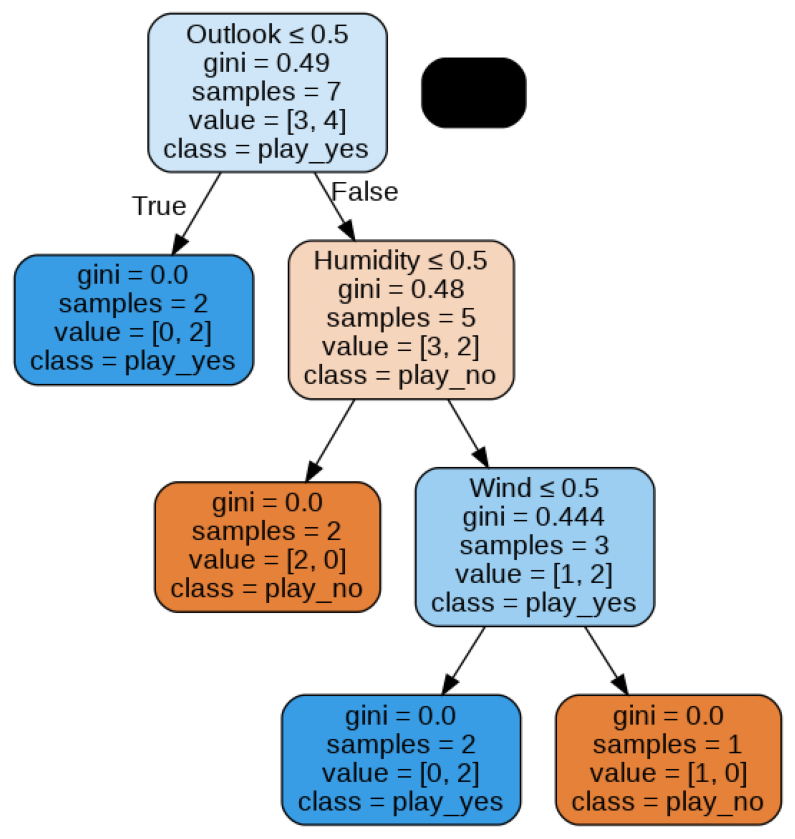

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = column_name,class_names=['play_no','play_yes'] )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree.png')

import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('DecisionTree.png'))
plt.axis('off');
plt.show();


#Questions
(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Nor- mal’, and Wind = ’False’?

In [ ]:
print(clf.predict([[1,2,1,0]]))

[1]


(2)What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

In [ ]:
print(clf.predict([[2,0,0,1]]))

[0]



#Exercise:

Task 1: Try the algo on iris dataset LabelEncoding of features:and Train test Division 95%-5%

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
#Load dataset
iris = datasets.load_iris()

In [ ]:
print("feature name : ",iris.feature_names)
print("data shape :",iris.data.shape)
print("label name :",iris.target_names)

feature name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data shape : (150, 4)
label name : ['setosa' 'versicolor' 'virginica']


In [ ]:
#import the necessary module
from sklearn.model_selection import train_test_split

x = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.05,random_state=144)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=144)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[2, 0, 0],
       [0, 2, 0],
       [0, 0, 4]])

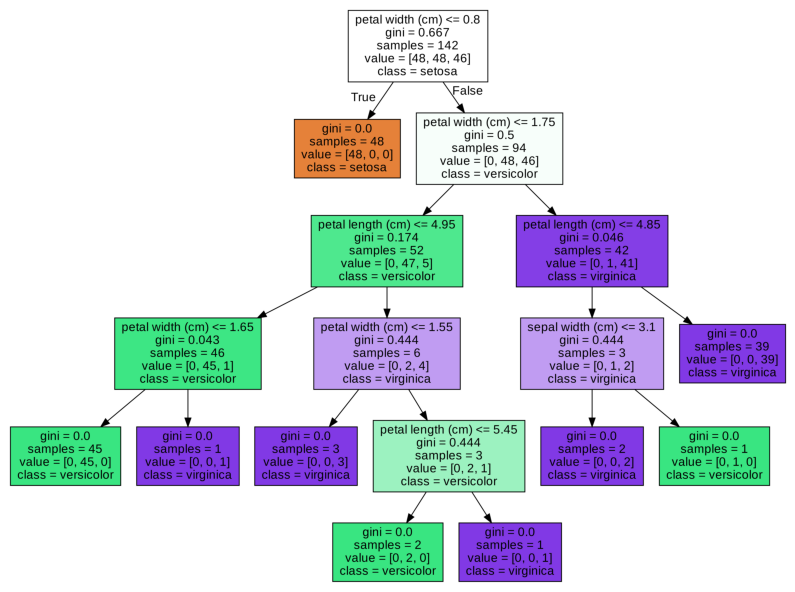

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='iris_tree.dot',feature_names=list(iris.feature_names),class_names=list(iris.target_names), filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()

#Exercise:

Task 2: Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 66%-34%

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
#Load dataset
wine = datasets.load_wine()


In [ ]:
print("feature name : ",wine.feature_names)
print("data shape :",wine.data.shape)
print("label name :",wine.target_names)

feature name :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
data shape : (178, 13)
label name : ['class_0' 'class_1' 'class_2']


In [ ]:
#import the necessary module
from sklearn.model_selection import train_test_split

x = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.34,random_state=144)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9344262295081968


In [ ]:
from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)


confusion matrix : 



array([[19,  0,  0],
       [ 1, 22,  3],
       [ 0,  0, 16]])

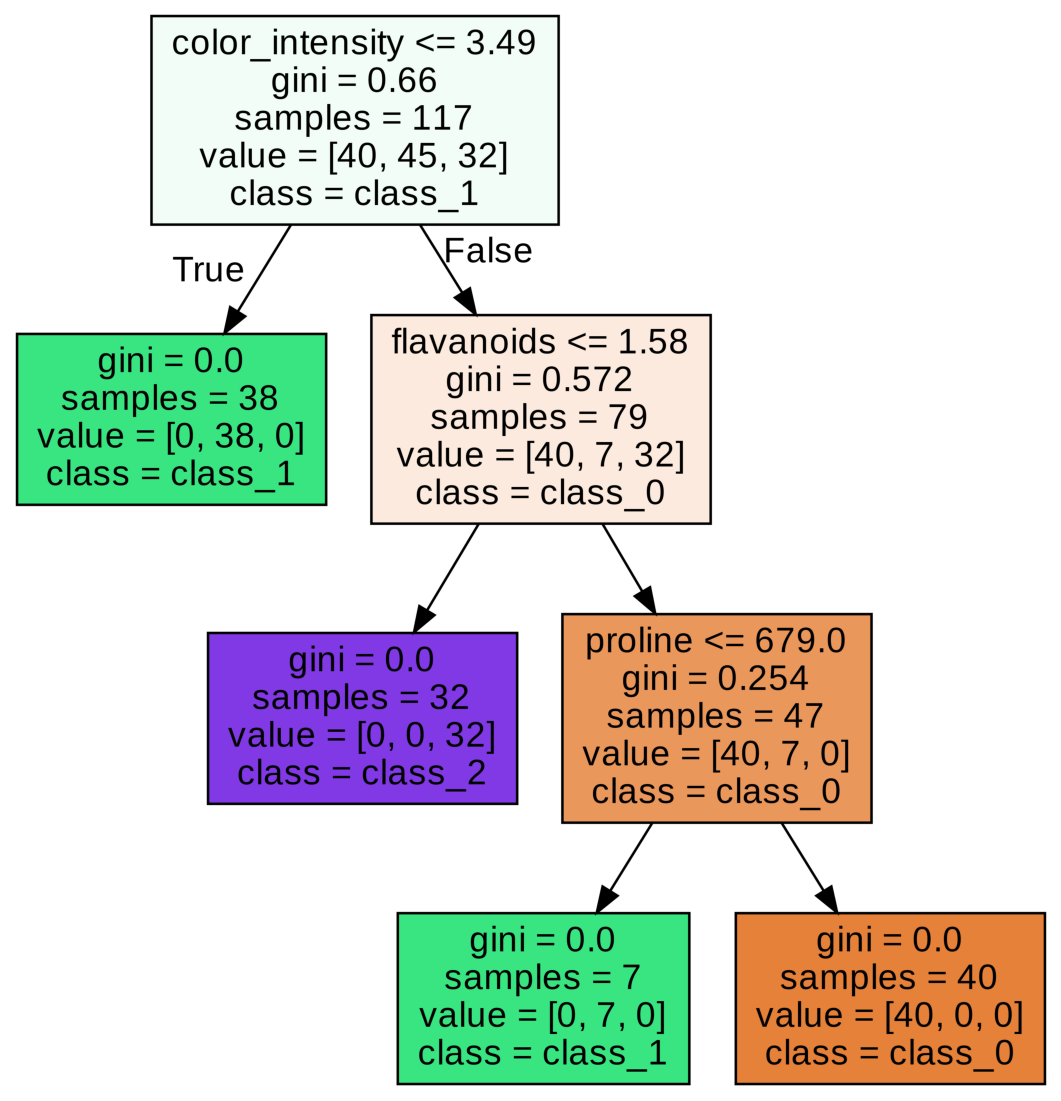

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='wine_tree.dot',feature_names=list(wine.feature_names),class_names=list(wine.target_names), filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'])

import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()